In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Categories of Machine Learning
- Supervised learning :- involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data
- This is further subdivided into classification tasks and regression tasks:
- in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
- Unsupervised learning :- involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
- These models include tasks such as clustering and dimensionality reduction.
-  Clustering algorithms identify distinct groups of data,while dimensionality reduction algorithms search for more succinct representations of the data.
- semi-supervised learning methods, which falls somewhere between supervised learning and unsupervised learning. <br> Semi-supervised learning methods are often useful when only incomplete labels are available.

#### Classification: Predicting discrete labels

(-1.0, 4.0, -2.0, 7.0)

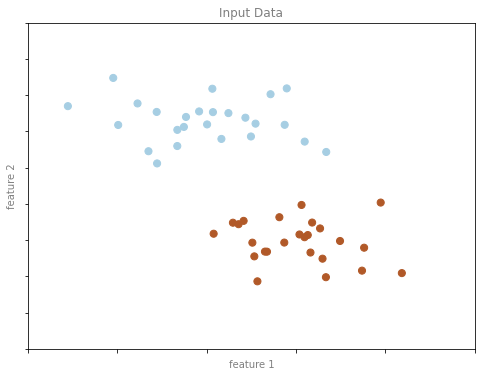

In [6]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')


from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)


# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

- Here we have two-dimensional data: that is, we have two features for each point, represented by the (x,y) positions of the points on the plane. In addition, we have one of two class labels for each point, here represented by the colors of the points. From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."
- the <b>model parameters</b> are the particular numbers describing the location and orientation of that line for our data. <b>The optimal values</b> for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called <b>training the model.</b>

(-1.0, 4.0, -2.0, 7.0)

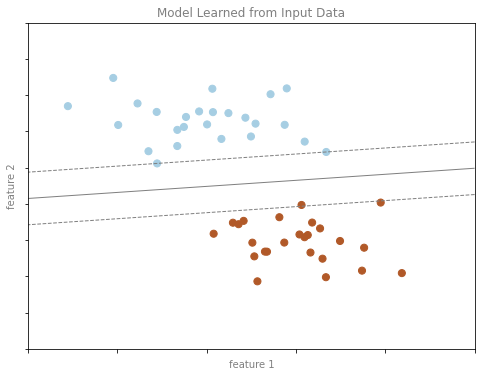

In [7]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

- Now that this model has been <b>trained</b>, it can be generalized to new, <b>unlabeled data.</b> <br> In other words, we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model

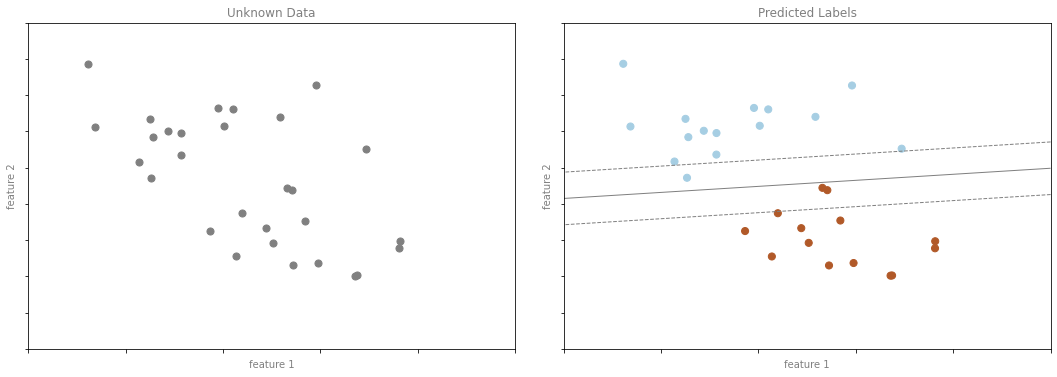

In [9]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

- this is similar to the task of automated spam detection for email; in this case, we might use the following features and labels
    - For the training set, these labels might be determined by individual inspection of a small representative sample of emails; for the remaining emails, the label would be determined using the model. For a suitably trained classification algorithm with enough well-constructed features (typically thousands or millions of words or phrases), this type of approach can be very effective